In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image 
from sklearn.neighbors import KNeighborsClassifier


# FAZENDO O DOWNLOAD DO DATASET
!pip install wget
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv


# IMPORTANDO O DATASET PARA O DATAFRAME
df = pd.read_csv('dataset_einstein.csv', delimiter=';')

# MOSTRANDO AS PRIMEIRAS CINCO LINHAS
print(df.head(5))

count_row = df.shape[0]  # PEGANDO OS NÚMEROS DE REGISTROS
count_col = df.shape[1]  # PEGANDO OS NUMEROS DE COLUNAS

print(count_row)
print(count_col)
# REPAREM QUE HÁ MUITOS REGISTROS EM QUE HÁ DADOS FALTANDO NOS CAMPOS 





/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=afee4c102a7ef223e9e70f33e54b0369150f18728a7eef01e8db37f83f0d2486
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
--2021-04-15 14:56:27--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248868 (243K) [text/plain]
Saving to: ‘dataset_einstein.csv’

dataset_einstein.cs 100%[===================>] 243.04K  --.-KB/s    in 0.06s   

2021-04-15 14:56:27 (4.19 MB/s) - ‘dataset_einstein.csv’ saved [248868/248868]

        Patient ID  Patient age quantile  ... Proteina C reativa mg/dL  Creatinine
0  44

Precisamos deixar o dataset somente com os registros que tenham todos os campos (para evitar ruídos e distorções)

In [2]:
# REMOVENDO OS REGISTROS NOS QUAIS PELO MENOS UM CAMPO ESTÁ EM BRANCO (NAN) 
df = df.dropna()

print(df.head(5))

print('Quantidade de campos(colunas): ', df.shape[1])
print('Total de registros:', df.shape[0])

#VAMOS VERIFICAR SE O BANCO DE DADOS ESTÁ BALANCEADO OU DESBALANCEADO
print ('Total de registros negativos: ', df[df['SARS-Cov-2 exam result'] =='negative'].shape[0])
print ('Total de registros positivos: ', df[df['SARS-Cov-2 exam result'] =='positive'].shape[0])


         Patient ID  Patient age quantile  ... Proteina C reativa mg/dL  Creatinine
1   126e9dd13932f68                    17  ...                -0.147895    2.089928
8   8bb9d64f0215244                     1  ...                -0.286986   -1.838623
28  fc41531ca4faf1e                    13  ...                -0.434025   -0.701411
29  891d0f6449ff3d7                    14  ...                -0.529401    0.332418
30  ebdd7c67fcb21b4                     9  ...                 0.545572    1.021638

[5 rows x 11 columns]
Quantidade de campos(colunas):  11
Total de registros: 357
Total de registros negativos:  302
Total de registros positivos:  55


Precisamos converter o Dataframe para um Array Numpy, que é o tipo de dados que iremos usar no treinamento. Também iremos já separar o Dataset em dois. Um com as features de entrada, e outro com os labels (etiquetas, rótulos do registro).   

Neste caso, estamos tentando fazer um classificador para o teste do Covid, neste caso, queremos treinar o nosso modelo com a etiqueta presente no campo 'SARS-Cov-2 exam result'

In [3]:
# VAMOS JOGAR AS ETIQUETAS PARA Y
Y = df['SARS-Cov-2 exam result'].values 
print(Y)

# X SERÁ A NOSSA MATRIZ COM AS FEATURES
# VAMOS PEGAR OS CAMPOS DE TREINAMENTO (Hemoglobin, Leukocytes, Basophils, Proteina C reativa mg/dL)

X = df[['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']].values

# VAMOS MOSTRAR X 
print(X)




['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negat

Agora precisamos dividir o nosso Dataset em dois: um para o treino (80% dos dados) e outro para o teste (20% dos dados)

In [4]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=3)


Agora vamos criar o e treinar o nosso modelo. Lembram da diferença entre algortimo e modelo? Existe o algortimo de treinamento (que neste caso é o de árvore de decisão) que irá exportar um modelo treinado (que também é um algoritmo).

In [7]:


#DEFINE O NÚMERO DE VIZINHOS EM 4
K = 4
#CRIA O MODELO DE KNN
knn_algoritmo = KNeighborsClassifier(n_neighbors = K)

#AGORA PRECISAMOS TREINÁ-LO
knn_modelo = knn_algoritmo.fit(X_treino, Y_treino)




Vamos testar o modelo, fazendo as predições no dataset de teste.

In [8]:
# APLICANDO O MODELO NA BASE DE TESTES E ARMAZENDO O RESULTADO EM Y_PREDICOES
Y_predicoes = knn_modelo.predict(X_teste)


#AVALIAÇÃO DO MODELO 
#VAMOS AVALIAR O VALOR REAL DO DATASET Y_TESTE COM AS PREDIÇÕES
print("ACURÁCIA DA ÁRVORE: ", metrics.accuracy_score(Y_teste, Y_predicoes))
print (classification_report(Y_teste, Y_predicoes))


ACURÁCIA DA ÁRVORE:  0.8611111111111112
              precision    recall  f1-score   support

    negative       0.87      0.98      0.92        60
    positive       0.75      0.25      0.38        12

    accuracy                           0.86        72
   macro avg       0.81      0.62      0.65        72
weighted avg       0.85      0.86      0.83        72



#TESTAR PARA DIFERENTES VALORES DE K

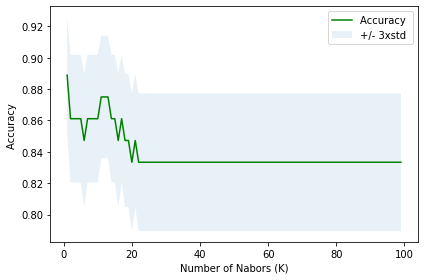

The best accuracy was with 0.8888888888888888 with k= 1


In [13]:
#TESTAR DIFERENTES VALORES PARA K
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #CRIA O MODELO DE KNN
    knn_algoritmo = KNeighborsClassifier(n_neighbors = n)

    #AGORA PRECISAMOS TREINÁ-LO
    knn_modelo = knn_algoritmo.fit(X_treino, Y_treino)

    #FAZ AS PREDIÇÕES
    yhat=knn_modelo.predict(X_teste)
    mean_acc[n-1] = metrics.accuracy_score(Y_teste, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_teste)/np.sqrt(yhat.shape[0])

mean_acc

#GRAFICO PARA OS DIFERENTES VALORES DE K
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
